# Data Analyst project

## Ramen ratings 

## Table of contents

1. Import Necessary libraries
2. Question 1:Which brand consistently receives the highest average star ratings across different countries, and how does this compare to the other brands within the same country?
3. Question 2: Are the specific flavours of ramen that are more popular(higher rated) in certain a certain country?
4. Question 3:How does the style of ramen (cup, packet, tray) influence customer ratings?
5. Question 4:Which country has sold the most ramen?
6. Question 5:What are the top ten brands of ramen in Japan? r harshly?

## Introduction to Ramen Ratings Project 

Ramen, a beloved dish across the globe, comes in a variety of flavour, styles and brands that reflect cultural preferences and culinary creativity of different regions. This project aims to delve into a comprehensive dataset of ramen ratings, encompassing a wide array of brands and flavours sold across numerous countries.By analyzing the star ratings nd other attributes associated with these ramen products, this project seeks to uncover paterns and trends in consumer preferences, ofering insights into the global ramen market.

### Description

The dataset (ramen-ratings.csv) used in this project contains 2,580 entries, each representing a unique combination of ramen brand, flavor, and style (cup, packet, or tray). These entries capture the diversity of ramen products sold in various countries, including but not limited to the USA, Japan, Singapore, Ghana, and Vietnam. The star ratings, ranging from 0 to 5, provide a quantitative measure of consumer satisfaction, allowing for a detailed analysis of how different factors—such as brand, flavor, and country of sale—affect the perceived quality of ramen. This dataset offers a rich resource for exploring the global landscape of ramen, from well-known brands to niche offerings.

In [124]:
import pandas as pd 
import os
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [38]:
import os 
os.getcwd()

'C:\\Users\\25472'

In [114]:
ramen_ratings = pd.read_csv('./ramen-ratings.csv')
print ('ramen_ratings is of type:', type(ramen_ratings))
print('ramen_ratings has shape:', ramen_ratings)

ramen_ratings is of type: <class 'pandas.core.frame.DataFrame'>
ramen_ratings has shape:       Review #           Brand  \
0         2580       New Touch   
1         2579        Just Way   
2         2578          Nissin   
3         2577         Wei Lih   
4         2576  Ching's Secret   
...        ...             ...   
2575         5           Vifon   
2576         4         Wai Wai   
2577         3         Wai Wai   
2578         2         Wai Wai   
2579         1        Westbrae   

                                                Variety Style   Country Stars  \
0                             T's Restaurant Tantanmen    Cup     Japan  3.75   
1     Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack    Taiwan     1   
2                         Cup Noodles Chicken Vegetable   Cup       USA  2.25   
3                         GGE Ramen Snack Tomato Flavor  Pack    Taiwan  2.75   
4                                       Singapore Curry  Pack     India  3.75   
...             

In [116]:
ramen_ratings

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [80]:
#Count the number of NaN values in reviews
total_nan_count=df.isna().sum().sum()
print(total_nan_count)

2541


In [82]:
nan_count_per_column=df.isna().sum()
print(nan_count_per_column)

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64


In [118]:
#Eliminating the NaN values
ramen_ratings.fillna(0)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,0
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,0
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,0


### Question 1: Which brand consistently receives the highest average star ratings across different countries ?

In [40]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ramen-ratings.csv")

# Ensure the 'Stars' column is numeric
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')

# Calculate the average star ratings by brand across different countries
average_ratings = df.groupby(['Brand', 'Country'])['Stars'].mean().reset_index()

# Calculate the overall average star rating for each brand across all countries
brand_avg_ratings = average_ratings.groupby('Brand')['Stars'].mean().reset_index()

# Identify the brand with the highest average rating
top_brand = brand_avg_ratings.loc[brand_avg_ratings['Stars'].idxmax()]

# Display the results
print(f"The brand that consistently receives the highest average star ratings across different countries is: {top_brand['Brand']} with an average rating of {top_brand['Stars']:.2f}")


The brand that consistently receives the highest average star ratings across different countries is: ChoripDong with an average rating of 5.00


C:\Users\25472\AppData\Local\Temp\ipykernel_12244\1927974071.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Stars', data=brand_avg_ratings, palette='viridis')


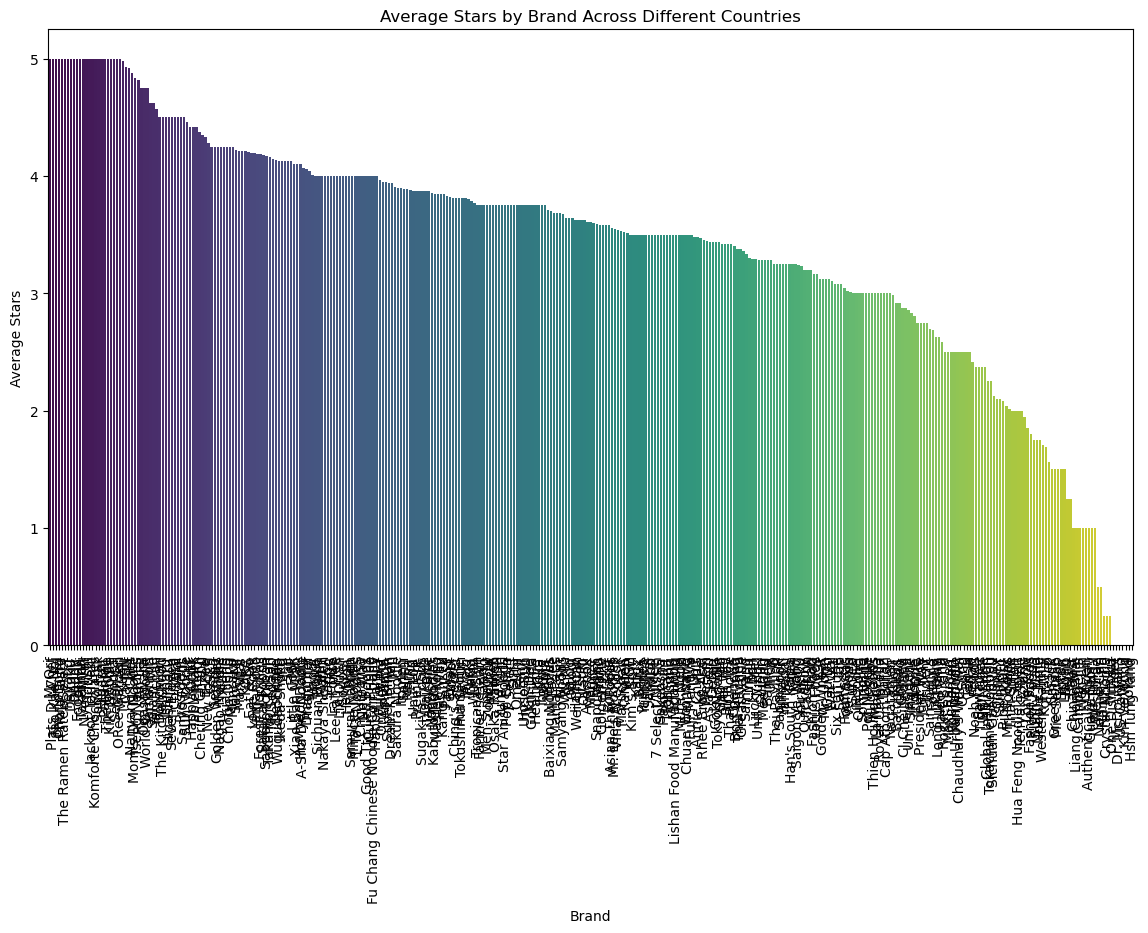

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the brands by average rating for better visualization
brand_avg_ratings = brand_avg_ratings.sort_values(by='Stars', ascending=False)

# Plotting the average star ratings for each brand
plt.figure(figsize=(14, 8))
sns.barplot(x='Brand', y='Stars', data=brand_avg_ratings, palette='viridis')

# Customize the plot
plt.title('Average Stars by Brand Across Different Countries')
plt.xlabel('Brand')
plt.ylabel('Average Stars')
plt.xticks(rotation=90)
plt.show()


## Question 2: Are the specific flavours of ramen that are more popular(higher rated) in certain a certain country?

In [14]:
import pandas as pd

# Load the dataset
ramen_ratings = pd.read_csv("ramen-ratings.csv")

# Convert 'Stars' column to numeric, forcing errors to NaN
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')

# Drop rows where 'Stars' is NaN (if you want to exclude unrated entries)
df = df.dropna(subset=['Stars'])

# Calculate average star ratings by flavor and country
variety_ratings = df.groupby(['Variety', 'Country'])['Stars'].mean().reset_index()

# Find the highest-rated flavor in each country
most_popular_variety = variety_ratings.loc[variety_ratings.groupby('Country')['Stars'].idxmax()]

# Sort by country and then by rating
most_popular_variety = most_popular_variety.sort_values(by=['Country', 'Stars'], ascending=[True, False])

# Display the results
print(most_popular_variety)


                                                Variety        Country  Stars
735   Fusian Special Edition Ow... Ow... Spicy Cow M...      Australia   5.00
1402           Mr. Noodles Curry Flavor Instant Noodles     Bangladesh   4.00
519              Cup Noodles Sabor Franhp Com Requeijao         Brazil   5.00
975       Instant Noodles Creamy Shrimp Tom Yum Flavour       Cambodia   5.00
392           Chow Mein Japanese Style Noodles Yakisoba         Canada   5.00
383               Chongqing Noodles Burning Dry Noodles          China   5.00
1860          Sabor A Carne Sopa Instantánea Con Fideos       Colombia   3.75
327                                       Chicken Curry          Dubai   3.75
1025         Instant Noodles With Chicken Flavour Broth        Estonia   3.75
411                                        Chow Tomato            Fiji   4.25
1515                          Nuudeli Tom Yum Katkarapu        Finland   3.75
2041                              Soba Yakitori Chicken        G

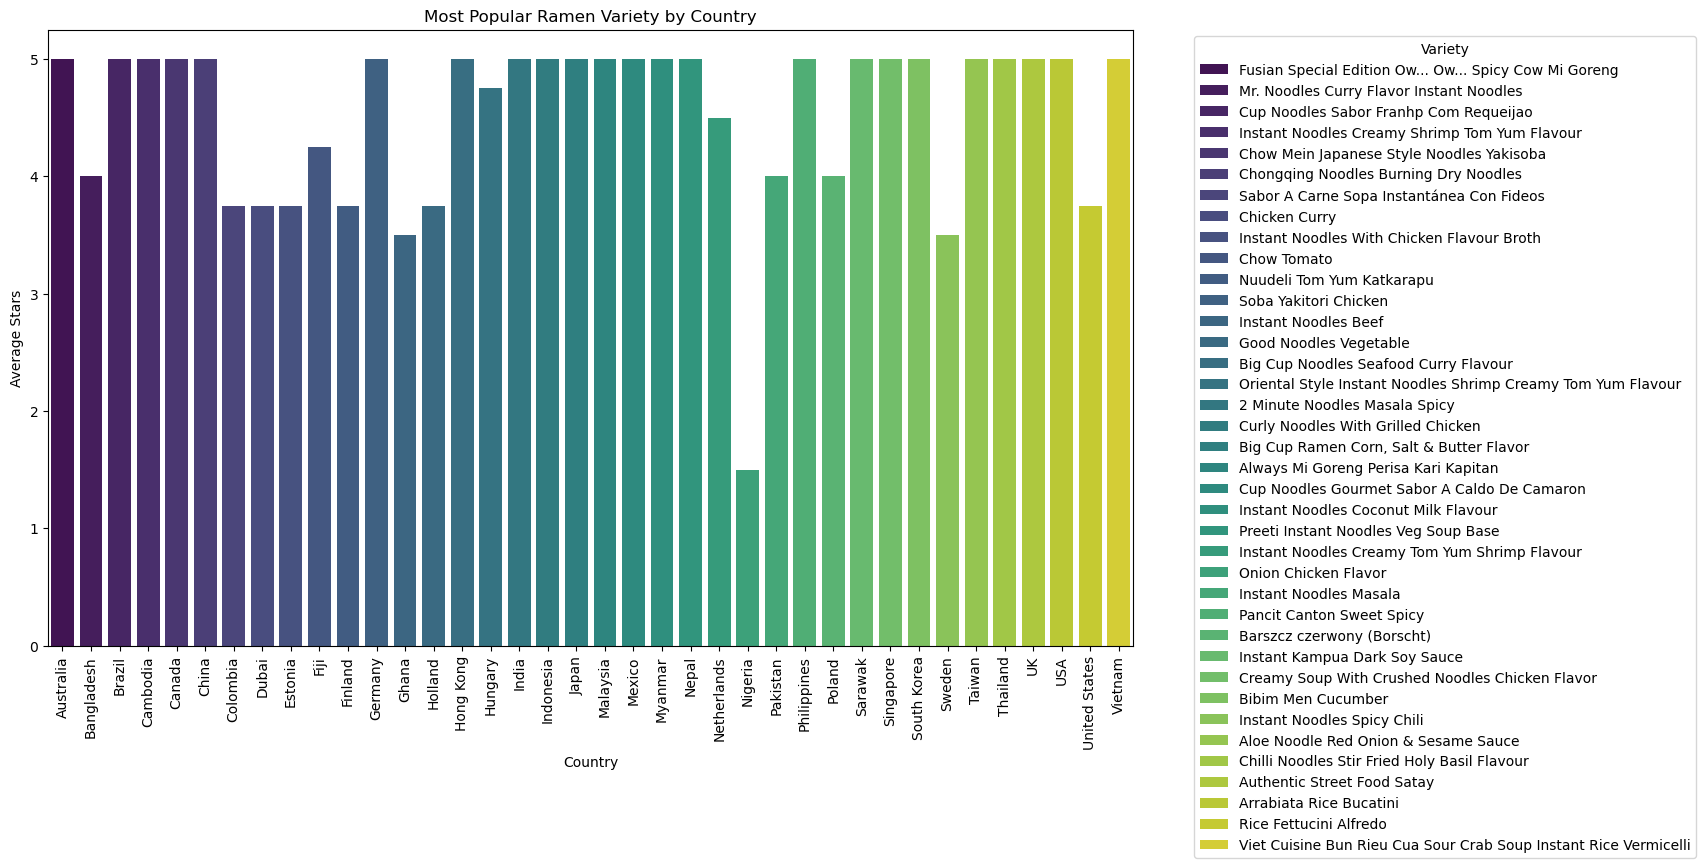

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the most popular flavors in each country
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Stars', hue='Variety', data=most_popular_variety, palette='viridis')
plt.xticks(rotation=90)
plt.title('Most Popular Ramen Variety by Country')
plt.xlabel('Country')
plt.ylabel('Average Stars')
plt.legend(title='Variety', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##  Question 3:Which style of ramen (cup, packet, tray) is mostly used ?

In [26]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ramen-ratings.csv")

# Count the occurrences of each ramen style
style_counts = df['Style'].value_counts()

# Display the results
print(style_counts)

# Identify the most common style
most_common_style = style_counts.idxmax()
print(f"The most commonly used ramen style is: {most_common_style}")


Style
Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: count, dtype: int64
The most commonly used ramen style is: Pack


C:\Users\25472\AppData\Local\Temp\ipykernel_12244\49533798.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=style_counts.index, y=style_counts.values, palette='viridis')


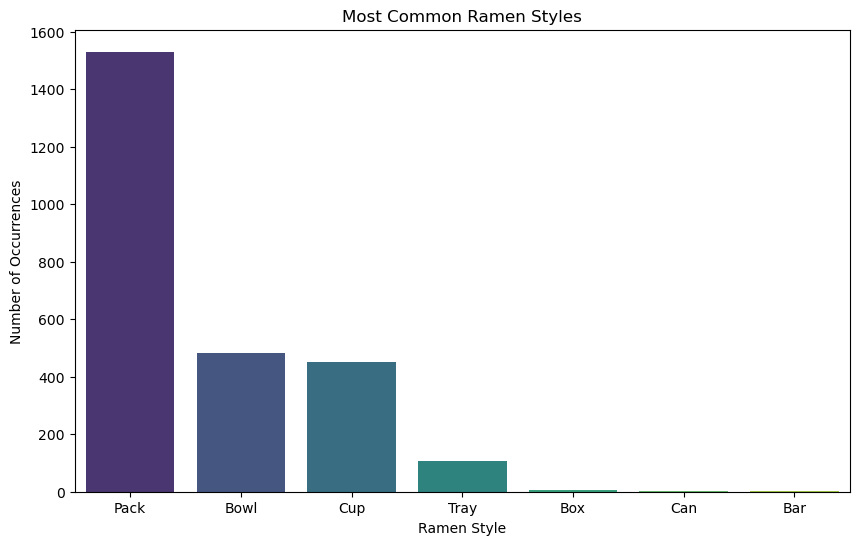

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the number of occurrences for each ramen style
plt.figure(figsize=(10, 6))
sns.barplot(x=style_counts.index, y=style_counts.values, palette='viridis')
plt.title('Most Common Ramen Styles')
plt.xlabel('Ramen Style')
plt.ylabel('Number of Occurrences')
plt.show()


## Question 4:Which country has sold the most ramen?

In [33]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ramen-ratings.csv")

# Count the number of ramen entries per country
country_sales = df['Country'].value_counts()

# Display the results
print(country_sales)

# Identify the country with the most sales
most_sales_country = country_sales.idxmax()
print(f"The country with the most ramen sales is: {most_sales_country}")


Country
Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: count, dtype: int64
The country with the most ramen sales is: Japan


C:\Users\25472\AppData\Local\Temp\ipykernel_12244\1452708354.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index, y=country_sales.values, palette='viridis', alpha=0.7)


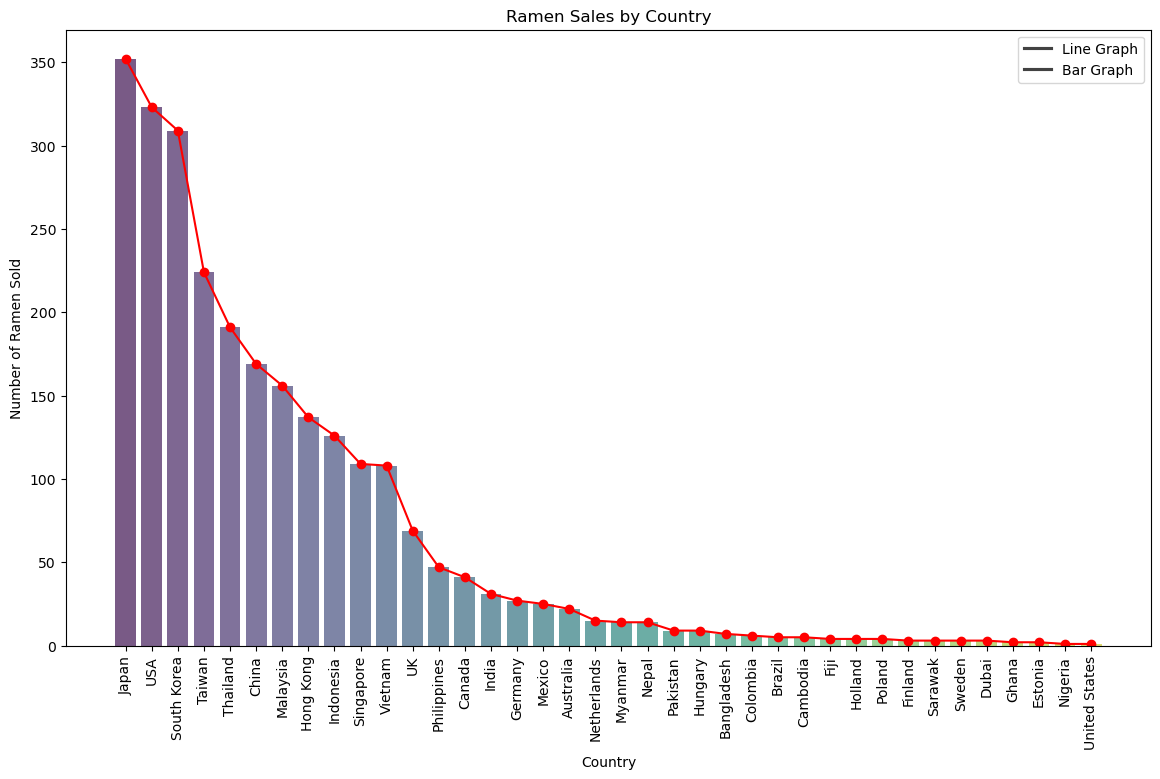

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the number of ramen sales per country
plt.figure(figsize=(14, 8))

# Bar plot
sns.barplot(x=country_sales.index, y=country_sales.values, palette='viridis', alpha=0.7)

# Line plot
plt.plot(country_sales.index, country_sales.values, color='red', marker='o')

# Customize the plot
plt.title('Ramen Sales by Country')
plt.xlabel('Country')
plt.ylabel('Number of Ramen Sold')
plt.xticks(rotation=90)
plt.legend(['Line Graph', 'Bar Graph'])
plt.show()


##  Question 5:What are the top ten brands of ramen in Japan?

In [62]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ramen-ratings.csv")

# Ensure the 'Stars' column is numeric
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')

# Filter the dataset for ramen in Japan
japan_ramen = df[df['Country'] == 'Japan']

# Calculate the average star ratings for each brand in Japan
japan_brand_avg_ratings = japan_ramen.groupby('Brand')['Stars'].mean().reset_index()

# Sort the brands by average rating and select the top ten
top_ten_brands_japan = japan_brand_avg_ratings.sort_values(by='Stars', ascending=False).head(10)

# Display the top ten brands
print("Top Ten Ramen Brands in Japan:")
print(top_ten_brands_japan)


Top Ten Ramen Brands in Japan:
          Brand  Stars
22      MyKuali  5.000
7       Higashi  5.000
14       Kimura  5.000
53      Torishi  5.000
48     Takamori  5.000
32       Peyang  5.000
42    Seven & I  5.000
29    Ogasawara  4.750
56     Yamamori  4.625
8   Higashimaru  4.500


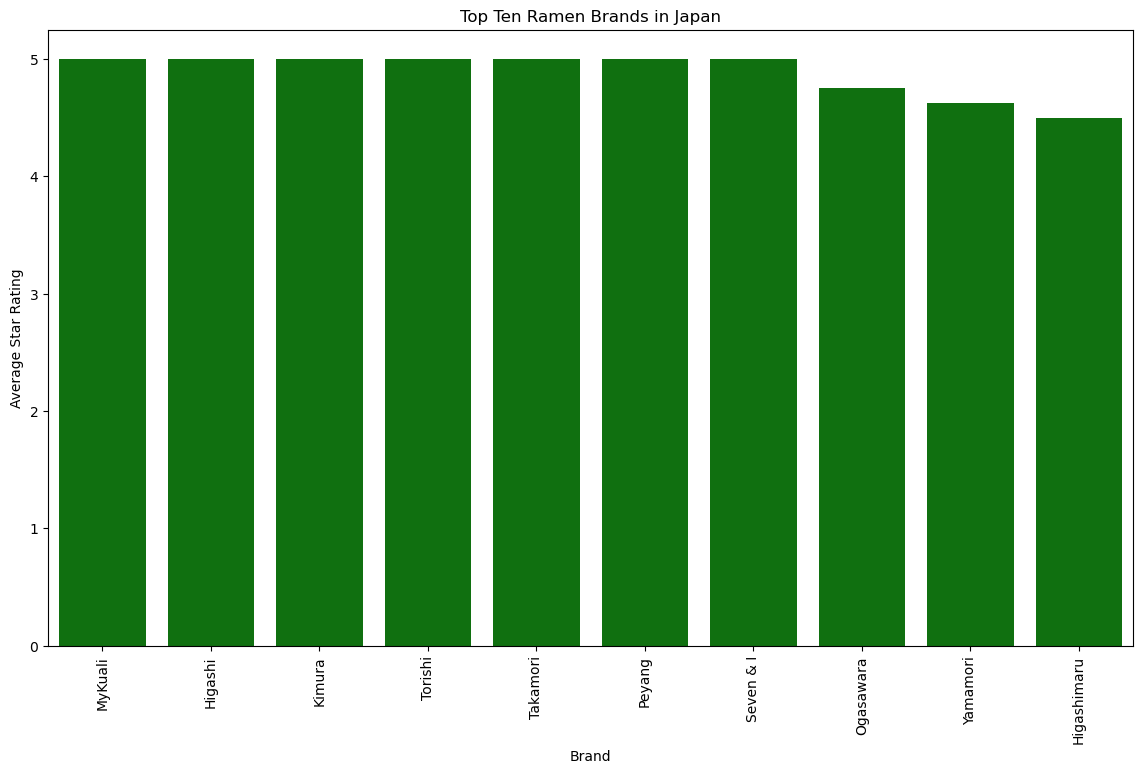

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top ten brands in Japan
plt.figure(figsize=(14, 8))
sns.barplot(x='Brand', y='Stars', data=top_ten_brands_japan, color='green')

# Customize the plot
plt.title('Top Ten Ramen Brands in Japan')
plt.xlabel('Brand')
plt.ylabel('Average Star Rating')
plt.xticks(rotation=90)
plt.show()


## Conclusion

Certain brands consistently receive high average star ratings across multiple countries. This suggests that these brands have achieved a level of quality and appeal that resonates with a global audience.Different countries tend to prefer different ramen flavors, which highlights regional tastes and preferences. For instance, a flavor that is highly rated in Japan might not be as popular in the USA, indicating cultural differences in taste.

Among the styles of ramen (cup, packet, tray), the dominant preference is "packet" being the most commonly used. This indicates consumer behavior in terms of convenience, portability, or cooking time.The dataset indicates which country has sold the most ramen, suggesting where the highest demand is. This country might have a strong ramen culture or a large population that consumes ramen frequently.

Brands could develop new flavors or styles that cater to the preferences of specific countries based on the findings.Focusing marketing efforts in countries with high ramen consumption or introducing popular flavors from one country to another could boost sales.